In [ ]:
import tensorflow as tf
import tensorflow_io as tfio

In [2]:
import os

PATH = 'C:\\Users\\CrankMuffler\\Documents\\GitHub\\RA2_alpine_lads'

os.chdir(PATH)

In [ ]:
import os
os.chdir('/mnt/jw01-aruk-home01/projects/psa_functional_genomics/RA_challenge/RA2_alpine_lads')

In [3]:
from utils.config import Config

test_config = Config('./utils/stadlerm_config.json')

In [4]:
from dataset.train_dataset import _get_dataframes

training_csv_file = os.path.join(test_config.train_location, "training.csv")

data_hands, data_feet = _get_dataframes(training_csv_file)

In [5]:
from dataset.train_dataset import _init_dataset

hands_dataset = _init_dataset(data_hands, test_config.train_location, test_config.fixed_dir, "RH")

In [6]:
from dataset.train_dataset import _resize_images
from dataset.train_dataset import _augment_images

hands_dataset = hands_dataset.shuffle(buffer_size=200)
hands_dataset = _augment_images(hands_dataset)
hands_dataset = _resize_images(hands_dataset, test_config.img_width, test_config.img_height)

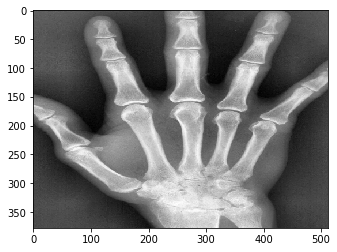

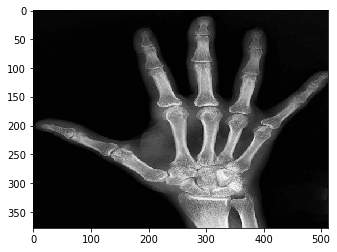

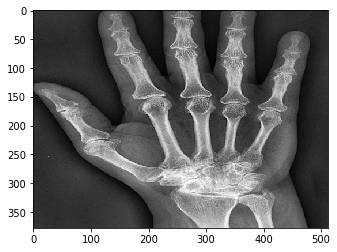

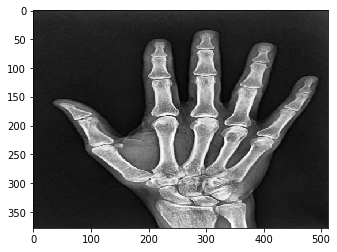

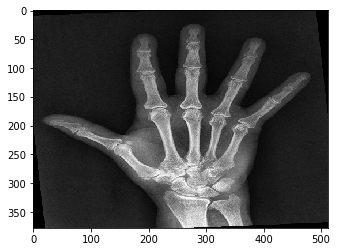

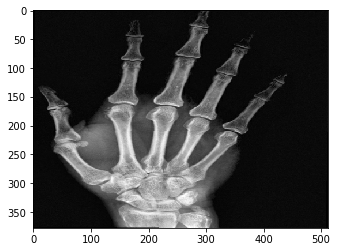

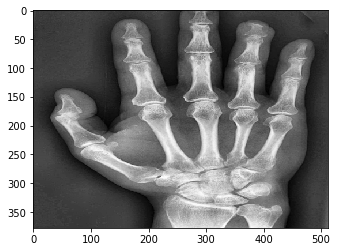

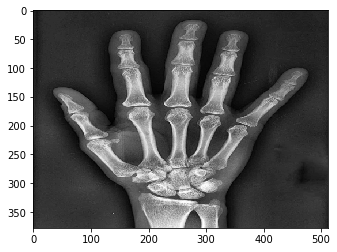

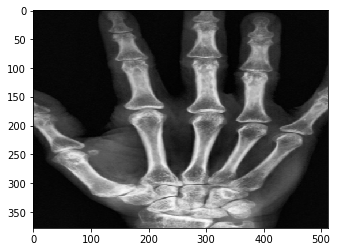

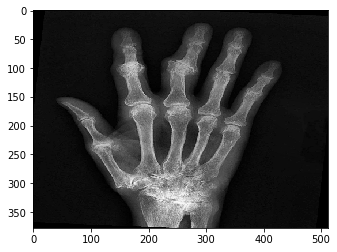

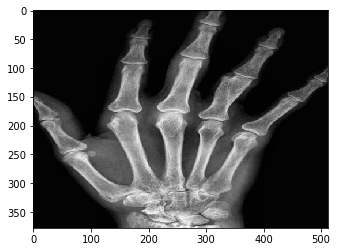

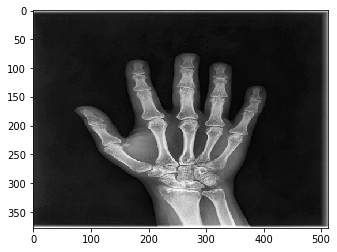

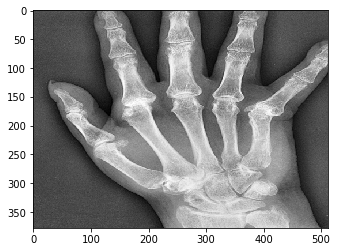

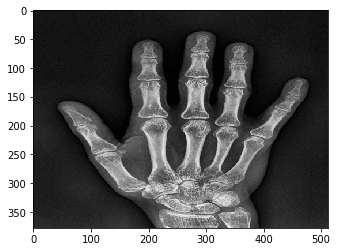

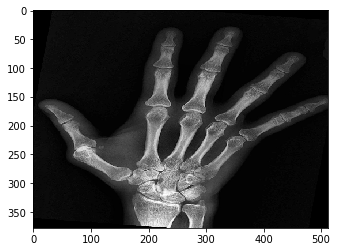

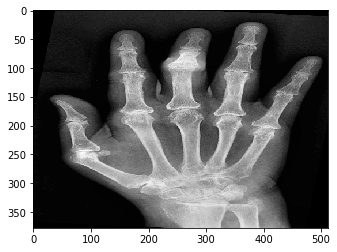

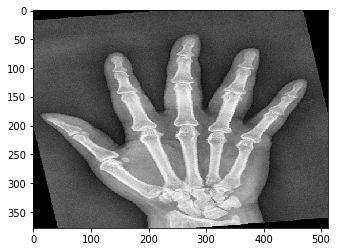

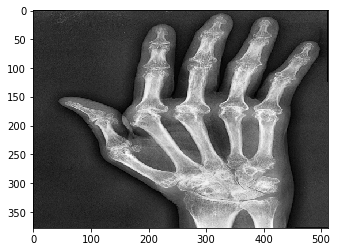

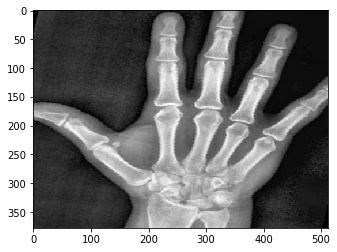

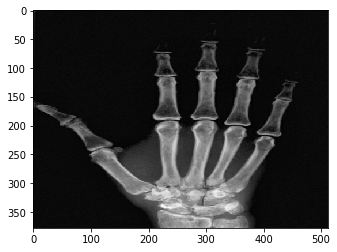

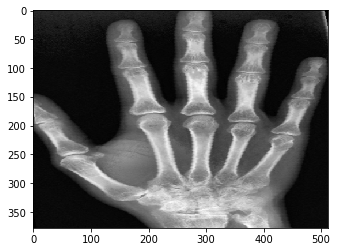

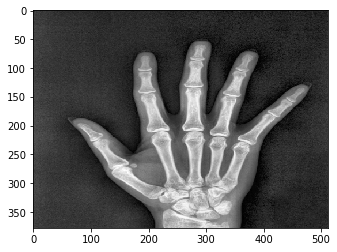

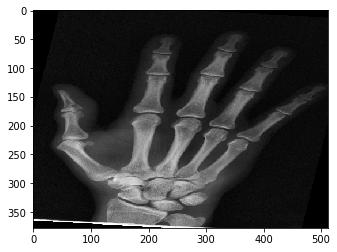

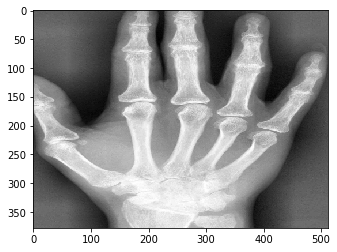

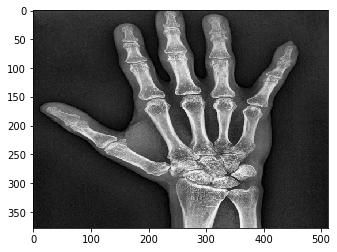

Runtime:  28.582889318466187


In [9]:
import matplotlib.pyplot as plt
import time

start = time.time()

for image, label in hands_dataset.take(25):
    plt.figure()
    plt.imshow(image[:, :, 0], cmap="gray")
    plt.show()
        
end = time.time()
print('Runtime: ', end - start)